In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import sys


In [2]:
df  = pd.read_csv('df_without_outliers.csv')

In [3]:
df = df.drop(columns='Unnamed: 0' )

In [4]:
df

,explicit,popularity,album_type,danceability,energy,key,loudness,mode,speechiness,acousticness,...,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_beats,n_bars,genre,popularity_art,followers
0,0,52,0,0.532,0.517,0,-9.846,1,0.4930,0.54700,...,275.90530,0.020,1.000,0.500,0.525,705.0,234.0,73,51.000000,2.188180e+05
1,0,45,0,0.750,0.340,5,-12.759,0,0.0326,0.16700,...,517.28253,0.678,0.326,0.410,0.589,1074.0,269.0,73,47.000000,2.316130e+05
2,0,39,0,0.801,0.639,7,-10.681,0,0.1040,0.02900,...,259.04180,0.847,0.457,0.904,0.760,516.0,171.0,73,44.000000,1.008280e+05
3,0,0,2,0.675,0.543,6,-11.983,0,0.0639,0.04840,...,387.41360,0.882,0.498,0.512,0.503,826.0,207.0,73,38.000000,1.483065e+05
4,0,0,1,0.761,0.671,11,-13.346,0,0.0418,0.51300,...,239.63574,0.882,1.000,0.474,0.459,493.0,123.0,73,45.000000,2.458390e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89336,1,23,2,0.466,0.982,5,-2.674,0,0.0752,0.00841,...,200.10376,0.729,1.000,0.088,0.182,585.0,145.0,30,71.666667,1.162675e+07
89337,1,56,2,0.666,0.720,9,-4.483,1,0.0269,0.37100,...,200.98611,0.712,1.000,0.395,0.535,339.0,84.0,30,47.000000,4.618400e+04
89338,1,80,0,0.813,0.627,11,-5.018,0,0.0486,0.07710,...,189.48643,0.814,0.990,0.097,0.330,417.0,106.0,30,82.500000,1.517423e+07
89339,0,60,2,0.653,0.779,0,-3.133,1,0.0392,0.37200,...,197.41605,0.650,1.000,0.545,0.604,359.0,89.0,30,42.500000,3.855350e+04


In [6]:

def popularity_discretizer(observation):
    pop_mean = df['popularity_art'].mean()
    pop_std = df['popularity_art'].std()
    if observation <= pop_mean - pop_std:
        return 'low popularity'
    elif observation <= pop_mean + pop_std:
        return 'medium popularity'
    else:
        return 'high popularity'

In [7]:
classes = df['popularity'].apply(popularity_discretizer)

In [8]:
from util import record2str, neuclidean

In [9]:
from datamanager import prepare_adult_dataset, prepare_dataset

In [10]:
df = df.drop(columns = 'popularity')

In [11]:
df['popularity_class']=classes

In [12]:
df

,explicit,album_type,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_beats,n_bars,genre,popularity_art,followers,popularity_class
0,0,0,0.532,0.517,0,-9.846,1,0.4930,0.54700,0.535000,...,0.020,1.000,0.500,0.525,705.0,234.0,73,51.000000,2.188180e+05,medium popularity
1,0,0,0.750,0.340,5,-12.759,0,0.0326,0.16700,0.648000,...,0.678,0.326,0.410,0.589,1074.0,269.0,73,47.000000,2.316130e+05,medium popularity
2,0,0,0.801,0.639,7,-10.681,0,0.1040,0.02900,0.466000,...,0.847,0.457,0.904,0.760,516.0,171.0,73,44.000000,1.008280e+05,medium popularity
3,0,2,0.675,0.543,6,-11.983,0,0.0639,0.04840,0.719000,...,0.882,0.498,0.512,0.503,826.0,207.0,73,38.000000,1.483065e+05,low popularity
4,0,1,0.761,0.671,11,-13.346,0,0.0418,0.51300,0.917000,...,0.882,1.000,0.474,0.459,493.0,123.0,73,45.000000,2.458390e+05,low popularity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89336,1,2,0.466,0.982,5,-2.674,0,0.0752,0.00841,0.323000,...,0.729,1.000,0.088,0.182,585.0,145.0,30,71.666667,1.162675e+07,low popularity
89337,1,2,0.666,0.720,9,-4.483,1,0.0269,0.37100,0.000000,...,0.712,1.000,0.395,0.535,339.0,84.0,30,47.000000,4.618400e+04,medium popularity
89338,1,0,0.813,0.627,11,-5.018,0,0.0486,0.07710,0.000616,...,0.814,0.990,0.097,0.330,417.0,106.0,30,82.500000,1.517423e+07,high popularity
89339,0,2,0.653,0.779,0,-3.133,1,0.0392,0.37200,0.000001,...,0.650,1.000,0.545,0.604,359.0,89.0,30,42.500000,3.855350e+04,medium popularity


In [13]:
class_name='popularity_class'
res = prepare_dataset(df, class_name)
df, feature_names, class_values, numeric_columns, rdf, real_feature_names, features_map = res
df.head()

,explicit,album_type,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_beats,n_bars,genre,popularity_art,followers,popularity_class
0,0,0,0.532,0.517,0,-9.846,1,0.4930,0.5470,0.535,...,0.020,1.000,0.500,0.525,705.0,234.0,73,51.0,218818.0,2
1,0,0,0.750,0.340,5,-12.759,0,0.0326,0.1670,0.648,...,0.678,0.326,0.410,0.589,1074.0,269.0,73,47.0,231613.0,2
2,0,0,0.801,0.639,7,-10.681,0,0.1040,0.0290,0.466,...,0.847,0.457,0.904,0.760,516.0,171.0,73,44.0,100828.0,2
3,0,2,0.675,0.543,6,-11.983,0,0.0639,0.0484,0.719,...,0.882,0.498,0.512,0.503,826.0,207.0,73,38.0,148306.5,1
4,0,1,0.761,0.671,11,-13.346,0,0.0418,0.5130,0.917,...,0.882,1.000,0.474,0.459,493.0,123.0,73,45.0,245839.0,1


In [ ]:
from sklearn.model_selection import train_test_split

test_size = 0.2
random_state = 100

X_train, X_test, y_train, y_test = train_test_split(
    df[feature_names].values, df[class_name].values,
    test_size=test_size,
    random_state=random_state, 
    stratify=df[class_name].values
)

# split the training set into train and validation sets
validation_size = 0.25  # This will result in 20% of the total data being used for validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,
    test_size=validation_size,
    random_state=random_state, 
    stratify=y_train
)

print(f'Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'Validation set shape: X_val: {X_val.shape}, y_val: {y_val.shape}')
print(f'Test set shape: X_test: {X_test.shape}, y_test: {y_test.shape}')

Training set shape: X_train: (53604, 25), y_train: (53604,)
Validation set shape: X_val: (17868, 25), y_val: (17868,)
Test set shape: X_test: (17869, 25), y_test: (17869,)


In [17]:
scaler = StandardScaler()
scaler.fit(X_train)
X_tr_new_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [18]:
X_train_big = scaler.fit_transform(X_train)

In [19]:
from sklearn.neural_network import MLPClassifier

In [20]:
def bb_predict(X):
    return bb.predict(X)

def bb_predict_proba(X):
    return bb.predict_proba(X)

In [21]:
bb = MLPClassifier(hidden_layer_sizes=(128, 64, 32,), alpha=0.1, learning_rate='adaptive',
                    activation='tanh', early_stopping=True, momentum=0.9, random_state=0)
bb.fit(X_train_big, y_train)
y_pred = bb_predict(X_test_scaled)
print('Accuracy %s  configuration 5' % accuracy_score(y_test, y_pred))
print('F1-score %s configuration 5' % f1_score(y_test, y_pred, average=None))
    
print(classification_report(y_test, y_pred))

Accuracy 0.7427947842632492  configuration 5
F1-score [0.19683656 0.78393064 0.73757225] configuration 5
              precision    recall  f1-score   support

           0       0.65      0.12      0.20       965
           1       0.80      0.77      0.78      8837
           2       0.69      0.79      0.74      8067

    accuracy                           0.74     17869
   macro avg       0.71      0.56      0.57     17869
weighted avg       0.74      0.74      0.73     17869



In [35]:
i2e = 78
x = X_test_scaled[i2e]
x

array([-0.30892502, -0.80869344,  0.94614578, -1.28294079,  0.48473478,
        0.3533208 ,  0.75692369, -0.50598984,  1.25597722, -0.53346366,
       -0.65001615,  0.26659437,  0.19523992,  0.73994011,  0.22359756,
        0.78831147, -0.21747061,  0.56744111,  0.02233248,  0.69229186,
        0.75460451,  0.67697151, -0.03634977,  1.69554538,  1.466928  ])

In [36]:
bb_outcome = bb_predict(x.reshape(1, -1))[0]
bb_outcome_str = class_values[bb_outcome]

print('bb(x) = { %s }' % bb_outcome_str)
print('')

bb(x) = { medium popularity }



In [22]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 1.7 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Using cached numpy-1.22.4-cp39-cp39-macosx_10_15_x86_64.whl.metadata (2.0 kB)
INFO: pip is looking at multiple versions of matplotlib to determine which version is compatible with other requirements. This could take a while.
Using cached numpy-1.22.4-cp39-cp39-macosx_10_15_x86_64.whl (17.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 1.9 MB/s eta 0:00:0000:0100:01
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=ce831b03cafceb2f4b77a6215236155b9290d659d66f9c5d14a77b5b163d4032
  Stored in directory: /Users/giulianogelsomino/Library/Caches/pip/wheels/ed/d7/c9/5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: matp

In [37]:
record2str(x, feature_names, numeric_columns)

'{ explicit = -0.30892501857669663, album_type = -0.8086934367762065, danceability = 0.9461457763927057, energy = -1.2829407937211788, key = 0.4847347754072896, loudness = 0.3533207993244406, mode = 0.7569236937069309, speechiness = -0.5059898435187933, acousticness = 1.2559772218788965, instrumentalness = -0.533463655526069, liveness = -0.6500161480975202, valence = 0.26659436869788683, tempo = 0.19523992359418912, features_duration_ms = 0.7399401144811912, time_signature = 0.22359755721790092, start_of_fade_out = 0.7883114725557507, tempo_confidence = -0.21747060525090295, time_signature_confidence = 0.5674411108640213, key_confidence = 0.022332478382050266, mode_confidence = 0.6922918629768716, n_beats = 0.7546045095655883, n_bars = 0.6769715101882413, genre = -0.03634977353456728, popularity_art = 1.6955453810739478, followers = 1.4669280022462332 }'

In [32]:
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt

In [38]:
lime_explainer = LimeTabularExplainer(
    X_train,
    feature_names=feature_names,
    class_names=[str(v) for v in class_values], 
    discretize_continuous=False
)

In [39]:
exp = lime_explainer.explain_instance(x, bb_predict_proba)

In [40]:
exp.local_exp

{1: [(24, -0.0377768391327982),
  (14, 0.015470933745587665),
  (3, 0.012918147174707245),
  (7, 0.009575592199845691),
  (10, 0.009159746999537843),
  (12, 0.007461119373100019),
  (22, 0.0065540453641052465),
  (18, 0.00631015029244271),
  (23, 0.0061402391838153835),
  (13, -0.006027362020591178)]}

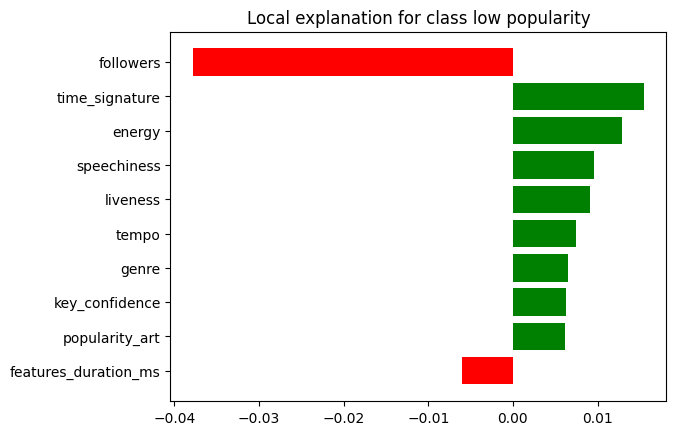

In [41]:
fig = exp.as_pyplot_figure()
plt.show()

In [48]:
i2e = 3
x = X_test_scaled[i2e]
x

array([ 3.23703145,  1.52473157,  1.25333098,  1.00016629, -0.0780672 ,
        1.04330401, -1.32113713,  1.26544299, -0.79093386, -0.53279395,
       -0.52294945, -0.28982293,  0.92341799, -0.31165149,  0.22359756,
       -0.27413486,  0.48421377,  0.36028234,  0.57469662,  0.89504492,
        0.13872186,  0.11078112, -0.21704187, -0.46373927, -0.29794407])

In [49]:
bb_outcome = bb_predict(x.reshape(1, -1))[0]
bb_outcome_str = class_values[bb_outcome]

print('bb(x) = { %s }' % bb_outcome_str)
print('')

bb(x) = { low popularity }



In [180]:
lime_explainer = LimeTabularExplainer(
   X_tr_new_scaled,
    feature_names=feature_names,
    class_names=[str(v) for v in class_values], 
    discretize_continuous=False
)

In [181]:
exp = lime_explainer.explain_instance(x, bb_predict_proba)

In [182]:
exp.local_exp

{1: [(23, -0.15001823331524222),
  (24, -0.0937011501416548),
  (13, -0.03484074070536716),
  (9, 0.030066545733974163),
  (19, -0.02496979567644403),
  (1, 0.01459511538499501),
  (2, 0.014511143134633909),
  (18, 0.013761602638719513),
  (12, 0.012488234013651931),
  (17, -0.00603560060694743)]}

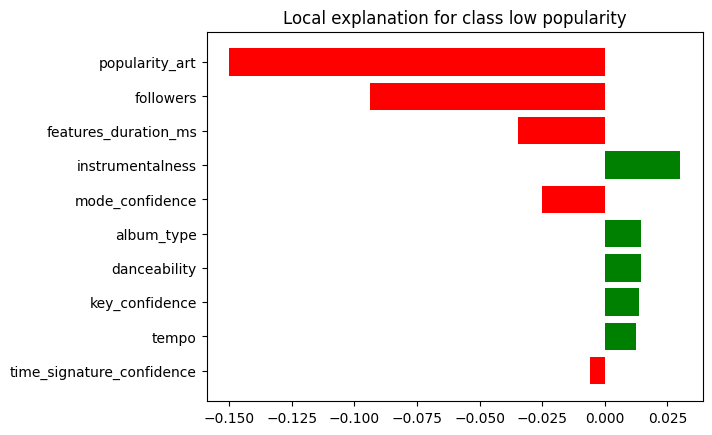

In [183]:
fig = exp.as_pyplot_figure()
plt.show()

In [196]:
i2e = 1
x = X_test[i2e]
x

array([ 0.0000000e+00,  0.0000000e+00,  6.4100000e-01,  3.6100000e-01,
        9.0000000e+00, -1.2315000e+01,  1.0000000e+00,  3.3600000e-02,
        6.3300000e-01,  1.9600000e-06,  1.4000000e-01,  4.5200000e-01,
        1.2328400e+02,  2.1910700e+05,  4.0000000e+00,  2.1021025e+02,
        7.3900000e-01,  1.0000000e+00,  9.2700000e-01,  6.6000000e-01,
        4.4000000e+02,  1.0900000e+02,  9.6000000e+01,  4.7000000e+01,
        2.6682100e+05])

In [200]:
bb_outcome = bb_predict(x.reshape(1, -1))[0]
bb_outcome_str = class_values[bb_outcome]

print('bb(x) = { %s }' % bb_outcome_str)
print('')

bb(x) = { medium popularity }



In [197]:
lime_explainer = LimeTabularExplainer(
    X_train,
    feature_names=feature_names,
    class_names=[str(v) for v in class_values], 
    discretize_continuous=False
)

In [198]:
exp = lime_explainer.explain_instance(x, bb_predict_proba)

In [199]:
exp.local_exp

{1: [(24, -0.13780589947225633),
  (13, -0.03348326398139901),
  (8, -0.004060618326065968),
  (7, -0.003826578623808103),
  (9, -0.003530356247888389),
  (19, -0.0029571696923143837),
  (1, -0.0029562760167485313),
  (16, -0.0029047246155861285),
  (4, -0.0024788599117630864),
  (18, 0.0012458555175413836)]}

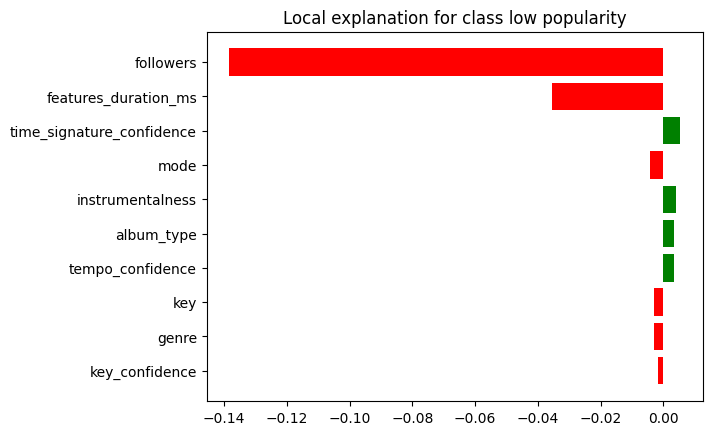

In [195]:
fig = exp.as_pyplot_figure()
plt.show()

In [ ]:
predicted_proba = bb_predict_proba(x.reshape(1, -1))[0]
predicted_class = predicted_proba.argmax()
print('Classe predetta:', class_values[predicted_class])

Classe predetta: medium popularity


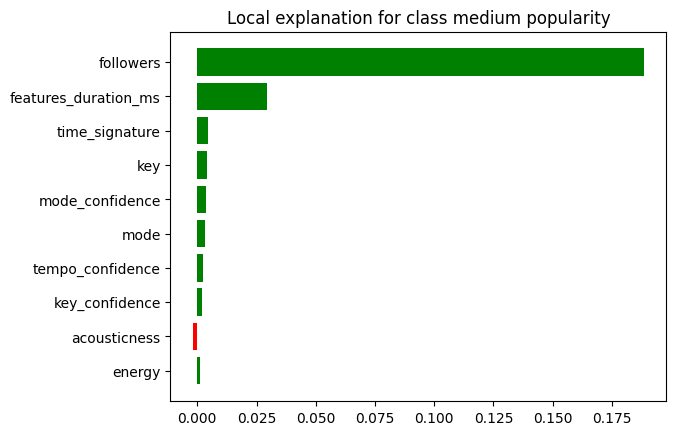

In [ ]:
# Use LIME 
exp = lime_explainer.explain_instance(
    x,
    bb_predict_proba,
    labels=[predicted_class])
fig = exp.as_pyplot_figure(label=predicted_class)
plt.show()

Predizione del modello per x = medium popularity


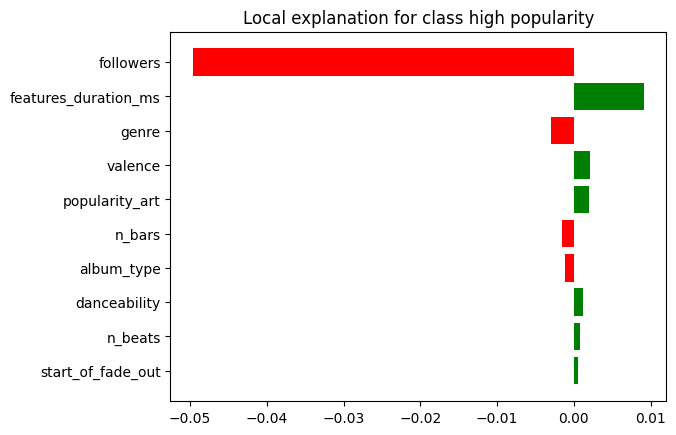

In [ ]:
import numpy as np

# find the instance with the highest probability for the "high popularity" class
high_popularity_index = None
highest_high_popularity_proba = -1

for i in range(len(X_test)):
    x_instance = X_test[i]
    predicted_proba = bb_predict_proba(x_instance.reshape(1, -1))[0]
    high_popularity_proba = predicted_proba[0]  # probability of the class "high popularity"
    if high_popularity_proba > highest_high_popularity_proba:
        highest_high_popularity_proba = high_popularity_proba
        high_popularity_index = i

if high_popularity_index is not None:
    x_high_popularity = X_test[high_popularity_index]
    
    # predict and check the highest probability for "high popularity"
    bb_outcome = bb_predict(x_high_popularity.reshape(1, -1))[0]
    bb_outcome_str = class_values[bb_outcome]
    print(f'Predizione del modello per x = {bb_outcome_str}')
    
    # use LIME to explain the instance
    exp = lime_explainer.explain_instance(
        x_high_popularity,
        bb_predict_proba,
        labels=[0]  # assure LIME explain for class "high popularity"
    )
    
    fig = exp.as_pyplot_figure(label=0)
    plt.show()
else:
    print("Non è stata trovata nessuna istanza con probabilità alta per 'high popularity'.")

Predizione del modello per x = medium popularity
Probabilità per "high popularity" = 0.14681220794369348


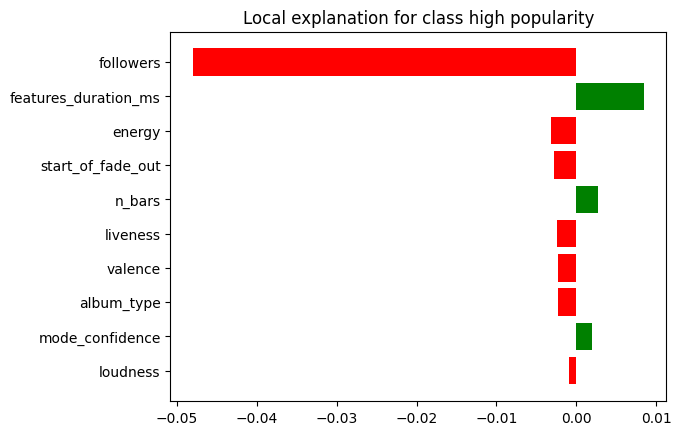

In [ ]:
import numpy as np

high_popularity_index = None
highest_high_popularity_proba = -1

for i in range(len(X_test)):
    x_instance = X_test[i]
    predicted_proba = bb_predict_proba(x_instance.reshape(1, -1))[0]
    high_popularity_proba = predicted_proba[0]  # Probability for the class "high popularity"
    if high_popularity_proba > highest_high_popularity_proba:
        highest_high_popularity_proba = high_popularity_proba
        high_popularity_index = i

if high_popularity_index is not None:
    x_high_popularity = X_test[high_popularity_index]
    
    # predict and check the highest probability for "high popularity"
    bb_outcome = bb_predict(x_high_popularity.reshape(1, -1))[0]
    bb_outcome_str = class_values[bb_outcome]
    print(f'Predizione del modello per x = {bb_outcome_str}')
    print(f'Probabilità per "high popularity" = {highest_high_popularity_proba}')
    
    # Usa LIME to explain the instance
    exp = lime_explainer.explain_instance(
        x_high_popularity,
        bb_predict_proba,
        labels=[0]  # assure LIME explain for class "high popularity"
    )
    
    fig = exp.as_pyplot_figure(label=0)
    plt.show()
else:
    print("Non è stata trovata nessuna istanza con probabilità alta per 'high popularity'.")